# Exploratory Data Analysis - User Reviews

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
plotly.tools.set_credentials_file(username='aamnanajmi', api_key='qh51CvyNnvU1t8TfIy93')
import plotly.figure_factory as ff

# Data Loading

In [19]:
import sys
project_path = "/home/aamna/Documents/apc/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [20]:
from src.data.json_loader import JSONLoader

In [21]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
file_path = '/home/aamna/Documents/apc/reviews_Electronics_5.json.gz'
loader = JSONLoader()

In [22]:
data = loader.load_data(file_path)

# Exploration

In [23]:
data.head()

,reviewTime,reviewerID,reviewerName,helpful,reviewText,asin,unixReviewTime,overall,summary
0,"06 2, 2013",AO94DHGC771SJ,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,0528881469,1370131200,5.0,Gotta have GPS!
1,"11 25, 2010",AMO214LNFCEI4,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",0528881469,1290643200,1.0,Very Disappointed
2,"09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",0528881469,1283990400,3.0,1st impression
3,"11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",0528881469,1290556800,2.0,"Great grafics, POOR GPS"
4,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,0528881469,1317254400,1.0,"Major issues, only excuses for support"


In [12]:
data.tail()

,reviewTime,reviewerID,reviewerName,helpful,reviewText,asin,unixReviewTime,overall,summary
1689183,"07 17, 2014",A34BZM6S9L7QI4,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,B00LGQ6HL8,1405555200,5.0,Boom -- Pop -- Pow. These deliver.
1689184,"07 15, 2014",A1G650TTTHEAL5,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,B00LGQ6HL8,1405382400,5.0,"Thin and light, without compromising on sound ..."
1689185,"07 17, 2014",A25C2M3QF9G7OQ,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,B00LGQ6HL8,1405555200,5.0,Same form factor and durability as the S1 with...
1689186,"07 18, 2014",A1E1LEVQ9VQNK,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",B00LGQ6HL8,1405641600,5.0,Superb audio quality in a very comfortable set...
1689187,"07 13, 2014",A2NYK9KWFMJV4Y,"Mike Tarrani ""Jazz Drummer""","[0, 0]",Normally when I receive a review sample I can ...,B00LGQ6HL8,1405209600,5.0,Exceptional sound


In [13]:
data.shape

(1689188, 9)

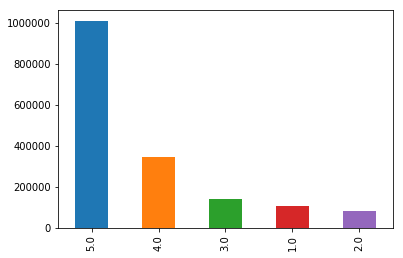

In [16]:
data.overall.value_counts().plot(kind='bar')

In [30]:
review_table = ff.create_table(data.head())
py.iplot(review_table, filename='review_table')
url=py.plot(review_table, filename='review_table',auto_open=False)

In [31]:
url

'https://plot.ly/~aamnanajmi/2'